In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mall customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df=df.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})

In [5]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df = df.drop('CustomerID',axis=1)

In [7]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Vizualisation

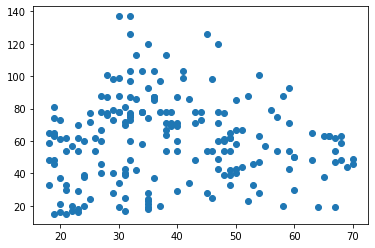

In [8]:
plt.scatter(df.Age, df.income)

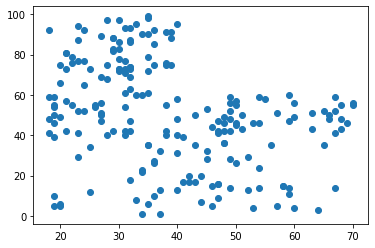

In [9]:
plt.scatter(df.Age, df.score)

Text(0.5, 0, 'Score')

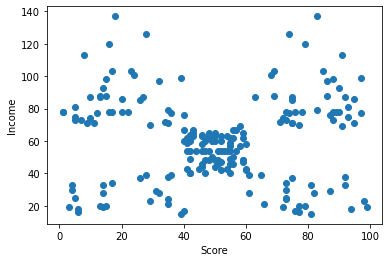

In [10]:
plt.scatter(df.score, df.income)
plt.ylabel('Income')
plt.xlabel('Score')

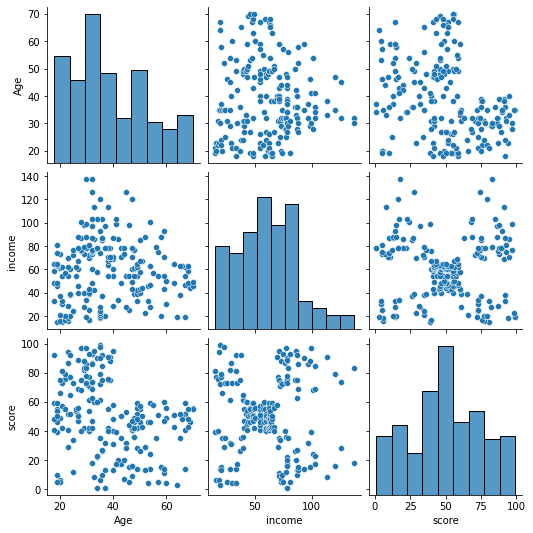

In [11]:
#pairplot

sns.pairplot(df[['Age','income','score']])

# Cluster

In [12]:
import sklearn.cluster as cluster

In [13]:
kmeans = cluster.KMeans(n_clusters=5)

In [14]:
predicted_clusters = kmeans.fit_predict(df[['income','score']])
predicted_clusters

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4,
       1, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 3, 0, 4, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [15]:
df['predicted_clusters'] = predicted_clusters

In [16]:
df

,Gender,Age,income,score,predicted_clusters
0,Male,19,15,39,1
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,3
197,Male,32,126,74,0
198,Male,32,137,18,3


In [17]:
centroid = kmeans.cluster_centers_
centroid 

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852]])

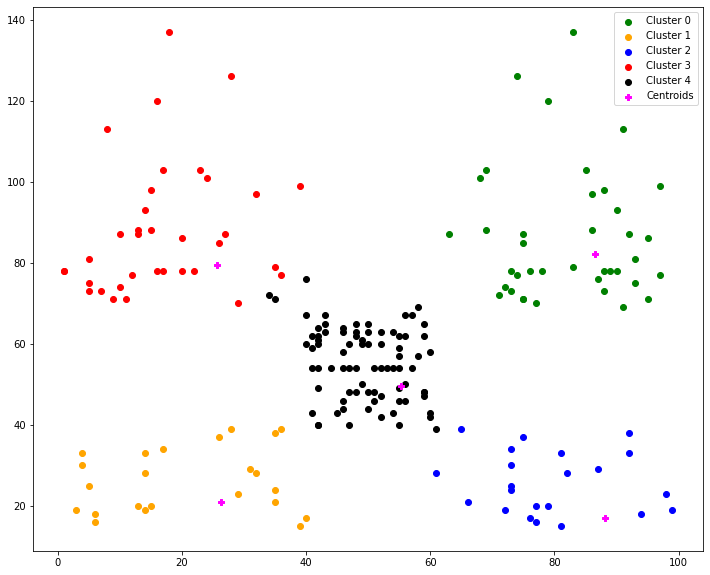

In [18]:
df0 = df[df.predicted_clusters==0]
df1 = df[df.predicted_clusters==1]
df2 = df[df.predicted_clusters==2]
df3 = df[df.predicted_clusters==3]
df4 = df[df.predicted_clusters==4]

plt.figure(figsize=(12,10))

plt.scatter(df0['score'],df0['income'],color='green',label='Cluster 0')
plt.scatter(df1['score'],df1['income'],color='orange',label='Cluster 1')
plt.scatter(df2['score'],df2['income'],color='blue',label='Cluster 2')
plt.scatter(df3['score'],df3['income'],color='red',label='Cluster 3')
plt.scatter(df4['score'],df4['income'],color='black',label='Cluster 4')

plt.scatter(centroid[:,0],centroid [:,1],color='magenta',marker="P",label='Centroids')

plt.legend()

# Hyper

In [19]:
from sklearn.cluster import KMeans
wcss = []
cluster = range(1,15)
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km.fit(df[['score','income']])
    wcss.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30566.45113025185,
 25043.890043290034,
 22155.14949036471,
 19669.71099830122,
 17553.82958734814,
 16021.148925612208,
 14264.768695356934,
 12825.554989618226]

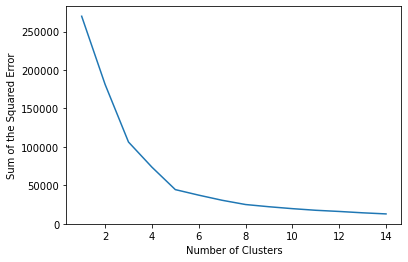

In [21]:
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of the Squared Error')
plt.plot(cluster,wcss)